In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("health_armaan.csv", parse_dates=["date"])

In [21]:
print("Rows × Cols:", df.shape)
print("Date range:", df["date"].min().date(), "→", df["date"].max().date())
df.dtypes.to_frame("dtype")

Rows × Cols: (1096, 33)
Date range: 2022-01-01 → 2024-12-31


,dtype
date,datetime64[ns]
HeartRate,float64
StepCount,float64
DistanceCycling,float64
WalkingAsymmetryPercentage,float64
DistanceWalkingRunning,float64
RestingHeartRate,float64
SixMinuteWalkTestDistance,float64
AppleWalkingSteadiness,float64
HeartRateVariabilitySDNN,float64


In [22]:
cols_to_scan = [
    "StepCount","DistanceWalkingRunning","DistanceCycling",
    "ActiveEnergyBurned","BasalEnergyBurned","AppleExerciseTime","AppleStandTime",
    "WalkingSpeed","WalkingStepLength","WalkingAsymmetryPercentage","WalkingDoubleSupportPercentage",
    "HeartRate","RestingHeartRate","HeartRateVariabilitySDNN","WalkingHeartRateAverage",
    "TimeInDaylight","HeadphoneAudioExposure",
    "EnergyBalance","MobilityIndex","StabilityIndex","HRFitnessIndex"
]
exist = [c for c in cols_to_scan if c in df.columns]
summary = df[exist].describe(percentiles=[.1,.25,.5,.75,.9]).T
summary[["count","mean","std","min","10%","25%","50%","75%","90%","max"]].round(2)


,count,mean,std,min,10%,25%,50%,75%,90%,max
StepCount,1096.0,9949.94,5540.78,0.00,1879.00,4999.25,10799.50,14409.75,17103.00,19916.00
DistanceWalkingRunning,1096.0,7.71,4.35,0.00,1.42,3.83,8.25,11.10,13.31,17.31
DistanceCycling,1096.0,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.61
ActiveEnergyBurned,1096.0,235.83,209.71,0.00,0.00,0.14,262.92,389.49,478.50,1153.96
BasalEnergyBurned,1096.0,1688.08,742.33,0.00,0.00,1814.88,1981.89,2113.27,2193.51,3816.82
AppleExerciseTime,747.0,17.80,15.05,1.00,2.00,7.99,15.00,23.02,34.17,125.00
AppleStandTime,721.0,162.00,86.89,1.00,53.00,89.00,155.00,226.00,284.00,421.00
WalkingSpeed,1053.0,3.99,0.54,2.05,3.43,3.74,3.98,4.18,4.42,6.59
WalkingStepLength,1053.0,68.56,5.81,39.50,63.00,65.82,68.34,70.37,72.61,95.94
WalkingAsymmetryPercentage,993.0,0.05,0.08,0.00,0.00,0.01,0.03,0.04,0.09,0.93


In [24]:
kpi = {
    "Avg Daily Steps": df["StepCount"].mean(),
    "Median Daily Steps": df["StepCount"].median(),
    "Avg Active Energy (kcal)": df["ActiveEnergyBurned"].mean(),
    "Avg Resting HR (bpm)": df["RestingHeartRate"].mean(),
    "Avg HRV SDNN (ms)": df["HeartRateVariabilitySDNN"].mean(),
    "Avg Mobility Index": df["MobilityIndex"].mean(),
    "Avg Stability Index": df["StabilityIndex"].mean(),
    "Avg HR Fitness Index": df["HRFitnessIndex"].mean(),
}
kpi_df = pd.Series(kpi).to_frame("value").round(2)
print("Overview KPIs")
kpi_df


Overview KPIs


,value
Avg Daily Steps,9949.94
Median Daily Steps,10799.50
Avg Active Energy (kcal),235.83
Avg Resting HR (bpm),64.72
Avg HRV SDNN (ms),50.61
Avg Mobility Index,48.24
Avg Stability Index,0.18
Avg HR Fitness Index,0.80


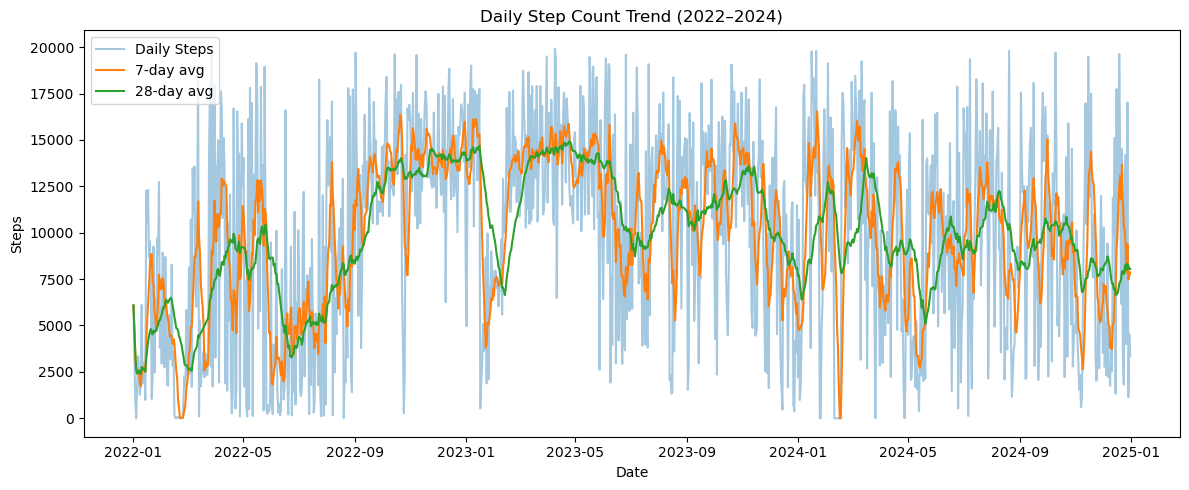

In [25]:
tmp = df[["date","StepCount"]].copy()
tmp["roll7"] = tmp["StepCount"].rolling(7, min_periods=1).mean()
tmp["roll28"] = tmp["StepCount"].rolling(28, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(tmp["date"], tmp["StepCount"], alpha=0.4, label="Daily Steps")
plt.plot(tmp["date"], tmp["roll7"], label="7-day avg")
plt.plot(tmp["date"], tmp["roll28"], label="28-day avg")
plt.title("Daily Step Count Trend (2022–2024)")
plt.xlabel("Date"); plt.ylabel("Steps"); plt.legend()
plt.tight_layout(); plt.show()


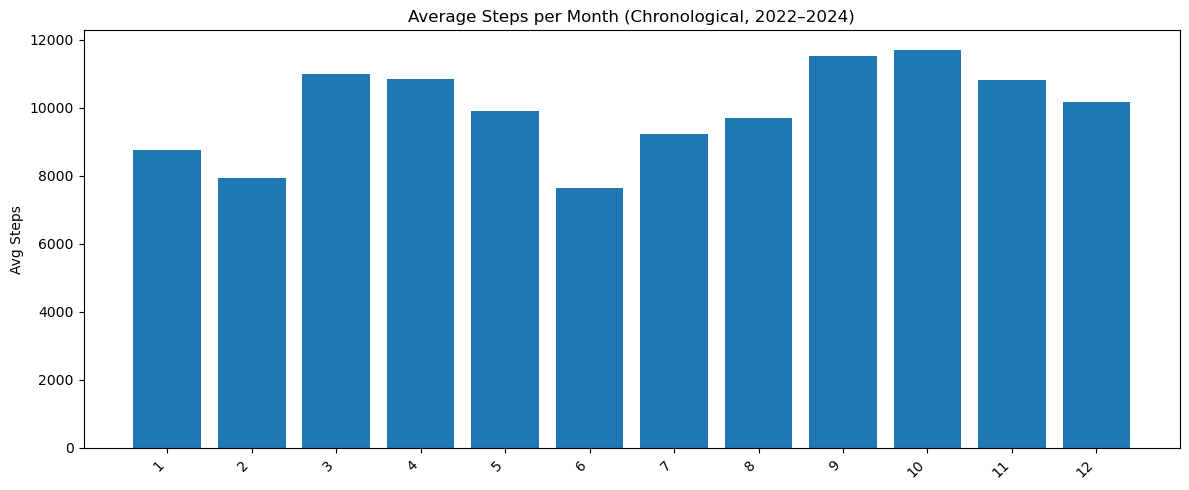

In [29]:
monthly = (
    df.groupby("month")["StepCount"].mean()
      .sort_index()
      .reset_index()
)

plt.figure(figsize=(12,5))
plt.bar(monthly["month"].astype(str), monthly["StepCount"])
plt.xticks(rotation=45, ha="right")
plt.title("Average Steps per Month (Chronological, 2022–2024)")
plt.ylabel("Avg Steps")
plt.tight_layout(); plt.show()


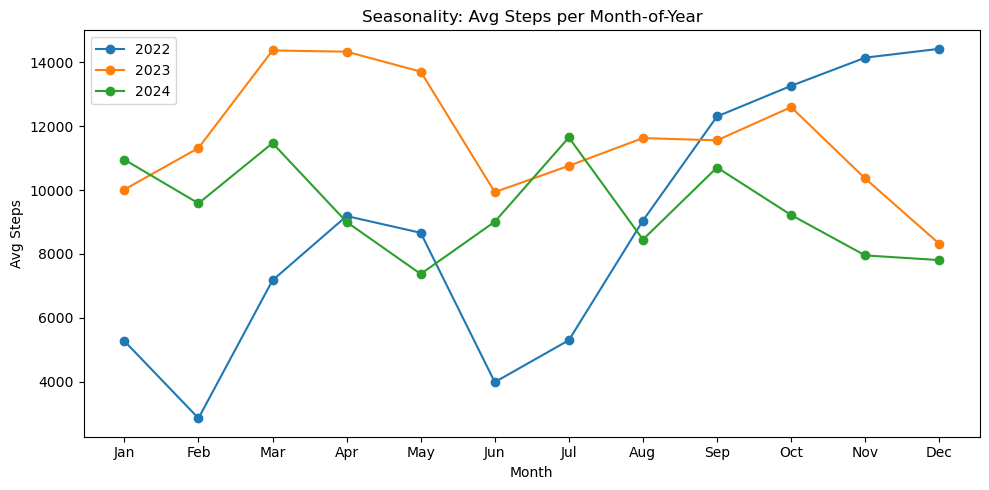

In [30]:
seasonal = (
    df.groupby(["year","month"])["StepCount"].mean()
      .reset_index()
      .pivot(index="month", columns="year", values="StepCount")
      .reindex(range(1,13))
)

plt.figure(figsize=(10,5))
for yr in seasonal.columns.dropna():
    plt.plot(seasonal.index, seasonal[yr], marker="o", label=str(yr))
plt.xticks(range(1,13), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title("Seasonality: Avg Steps per Month-of-Year")
plt.xlabel("Month"); plt.ylabel("Avg Steps"); plt.legend()
plt.tight_layout(); plt.show()


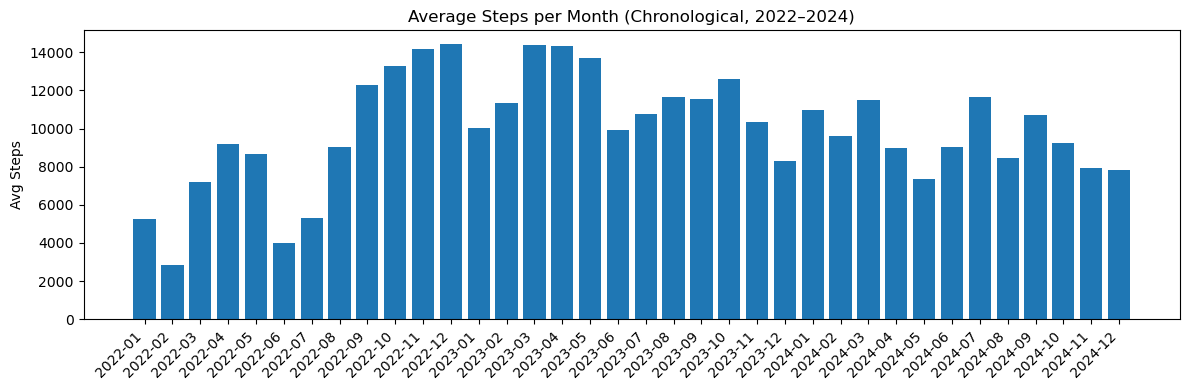

In [16]:
tmp = (
    df.assign(year_month=df["date"].dt.to_period("M"))
      .groupby("year_month")["StepCount"].mean()
      .sort_index()
      .reset_index()
)

plt.figure(figsize=(12,4))
plt.bar(tmp["year_month"].astype(str), tmp["StepCount"])
plt.xticks(rotation=45, ha="right")
plt.title("Average Steps per Month (Chronological, 2022–2024)")
plt.ylabel("Avg Steps")
plt.tight_layout(); plt.show()


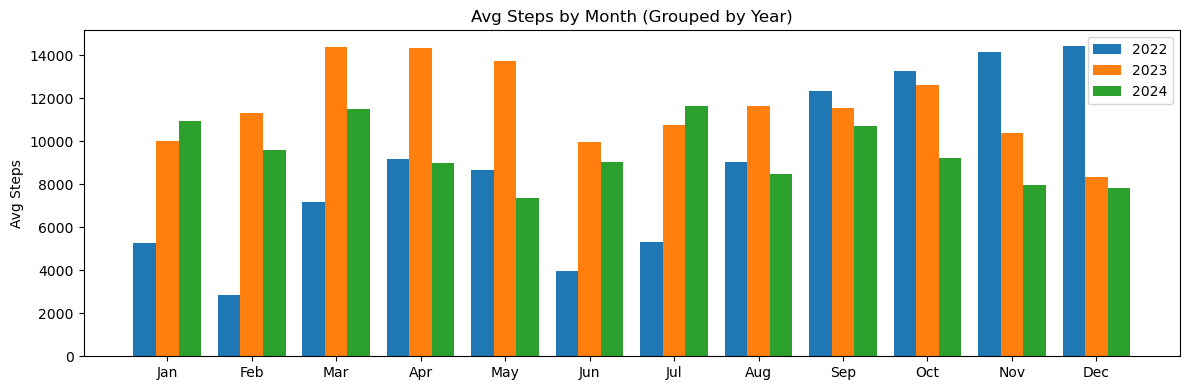

In [18]:
gb = (
    df.groupby(["year","month"])["StepCount"].mean()
      .reset_index()
      .pivot(index="month", columns="year", values="StepCount")
      .reindex(range(1,13))
)

months = gb.index.values
years = gb.columns.tolist()
w = 0.8 / max(1, len(years))
x = np.arange(len(months))

plt.figure(figsize=(12,4))
for i, yr in enumerate(years):
    plt.bar(x + i*w - (len(years)-1)*w/2, gb[yr].values, width=w, label=str(yr))
plt.xticks(x, ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
plt.title("Avg Steps by Month (Grouped by Year)")
plt.ylabel("Avg Steps")
plt.legend()
plt.tight_layout(); plt.show()

📊 Steps summary by year


,year,days,total_steps,avg_daily_steps
0,2022,365,3225960.0,8838.246575
1,2023,365,4226533.0,11579.542466
2,2024,366,3452637.0,9433.434426


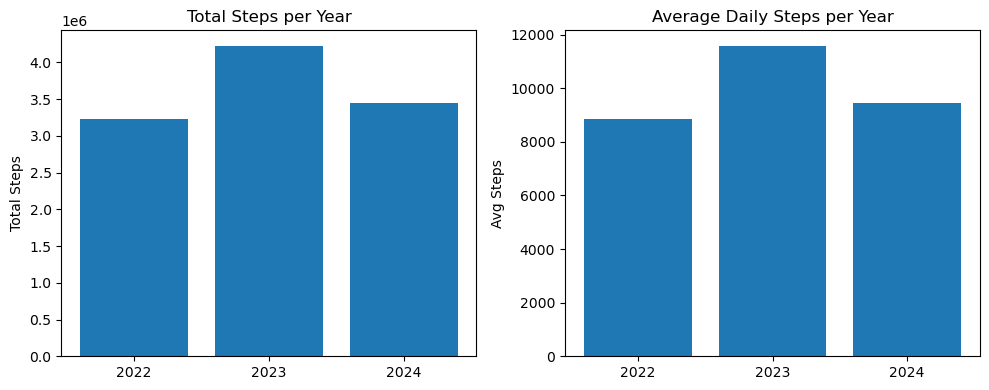

In [31]:
yearly = df.groupby("year").agg(
    days=("date","nunique"),
    total_steps=("StepCount","sum"),
    avg_daily_steps=("StepCount","mean")
).reset_index()

print("📊 Steps summary by year")
display(yearly)

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].bar(yearly["year"].astype(str), yearly["total_steps"])
ax[0].set_title("Total Steps per Year"); ax[0].set_ylabel("Total Steps")
ax[1].bar(yearly["year"].astype(str), yearly["avg_daily_steps"])
ax[1].set_title("Average Daily Steps per Year"); ax[1].set_ylabel("Avg Steps")
plt.tight_layout(); plt.show()
